# ML Project : Predicting Movie Revenue
Made by:

Corentin Maillard 21306

Mourad Mettioui 195019

## A) Data Understanding and analysis

### 1) Load the Dataset and libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

dataset_file_path = 'dataset.csv'
dataset_supplement_file_path = 'dataset_supplement.csv'

dataset_data = pd.read_csv(dataset_file_path, index_col=0)
dataset_supplement_data = pd.read_csv(dataset_supplement_file_path, index_col=0)

dataset_supplement_data.drop(columns=['title'], inplace=True)
left = dataset_data.set_index(['id'])
right = dataset_supplement_data.set_index(['movie_id'])
data_combind = left.join(right)
data_combind = data_combind.sort_values(by = 'id')


Combine data from the 2 different datasets.

### 2) Undersand the structure of the dataset

In [2]:
# examine the contents of the resultant Dataset using the head() command, which grabs the first five rows:
data_combind.head()

,vote_count,vote_average,title,tagline,status,spoken_languages,duration,revenue,release,countries_of_production,...,popularity,overview,original_title,original_language,keywords,homepage,genres,financial_investment,actors,production_crew
id,,,,,,,,,,,,,,,,,,,,,
5,530,6.5,Four Rooms,Twelve outrageous guests. Four scandalous requ...,Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",98.0,4300000.0,1995-12-09,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,22.876230,It's Ted the Bellhop's first night on the job....,Four Rooms,en,"[{""id"": 612, ""name"": ""hotel""}, {""id"": 613, ""na...",NaN,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 35, ""name...",4000000.0,"[{""cast_id"": 42, ""character"": ""Ted the Bellhop...","[{""credit_id"": ""52fe420dc3a36847f800012d"", ""de..."
11,6624,NaN,Star Wars,"A long time ago in a galaxy far, far away...",Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",121.0,775398007.0,1977-05-25,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,126.393695,Princess Leia is captured and held hostage by ...,Star Wars,en,"[{""id"": 803, ""name"": ""android""}, {""id"": 4270, ...",http://www.starwars.com/films/star-wars-episod...,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",11000000.0,"[{""cast_id"": 3, ""character"": ""Luke Skywalker"",...","[{""credit_id"": ""52fe420dc3a36847f8000437"", ""de..."
12,6122,7.6,Finding Nemo,"There are 3.7 trillion fish in the ocean, they...",Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",100.0,940335536.0,2003-05-30,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,85.688789,"Nemo, an adventurous young clownfish, is unexp...",Finding Nemo,en,"[{""id"": 494, ""name"": ""father son relationship""...",http://movies.disney.com/finding-nemo,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",94000000.0,"[{""cast_id"": 8, ""character"": ""Marlin (voice)"",...","[{""credit_id"": ""52fe420ec3a36847f80006b1"", ""de..."
13,7927,8.2,Forrest Gump,"The world will never be the same, once you've ...",Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",142.0,677945399.0,1994-07-06,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,138.133331,A man with a low IQ has accomplished great thi...,Forrest Gump,en,"[{""id"": 422, ""name"": ""vietnam veteran""}, {""id""...",NaN,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",55000000.0,"[{""cast_id"": 7, ""character"": ""Forrest Gump"", ""...","[{""credit_id"": ""52fe420ec3a36847f800076b"", ""de..."
14,3313,7.9,American Beauty,Look closer.,Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",122.0,356296601.0,1999-09-15,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,80.878605,"Lester Burnham, a depressed suburban father in...",American Beauty,en,"[{""id"": 255, ""name"": ""male nudity""}, {""id"": 29...",http://www.dreamworks.com/ab/,"[{""id"": 18, ""name"": ""Drama""}]",15000000.0,"[{""cast_id"": 6, ""character"": ""Lester Burnham"",...","[{""credit_id"": ""52fe420ec3a36847f8000809"", ""de..."


We can see the different features which are:
- vote count
- vote average
- title
- tagline
- status
- spoken languages
- duration
- release
- countries_of_production
- production
- popularity
- overview
- original_title
- original_language
- keywords
- homepage
- genres
- financial_investment
- actors
- production_crew

And we have the target : 
- revenue

We are going to see if all the data that we have are complete

In [3]:
data_combind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4803 entries, 5 to 459488
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vote_count               4803 non-null   int64  
 1   vote_average             4323 non-null   float64
 2   title                    4803 non-null   object 
 3   tagline                  3959 non-null   object 
 4   status                   4803 non-null   object 
 5   spoken_languages         4803 non-null   object 
 6   duration                 4801 non-null   float64
 7   revenue                  4755 non-null   float64
 8   release                  4802 non-null   object 
 9   countries_of_production  4803 non-null   object 
 10  production               4803 non-null   object 
 11  popularity               4803 non-null   float64
 12  overview                 4800 non-null   object 
 13  original_title           4803 non-null   object 
 14  original_language        45

### 3) Visualize key statistics

In [4]:
data_combind.describe()

,vote_count,vote_average,duration,revenue,popularity,financial_investment
count,4803.000000,4323.000000,4801.000000,4.755000e+03,4803.000000,4.419000e+03
mean,690.217989,6.090354,106.875859,8.231486e+07,21.492301,2.898466e+07
std,1234.585891,1.193315,22.611935,1.630872e+08,31.816650,4.065526e+07
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,54.000000,5.600000,94.000000,0.000000e+00,4.668070,7.500000e+05
50%,235.000000,6.200000,103.000000,1.918402e+07,12.921594,1.480000e+07
75%,737.000000,6.800000,118.000000,9.311911e+07,28.313505,4.000000e+07
max,13752.000000,10.000000,338.000000,2.787965e+09,875.581305,3.800000e+08


We can see for the vote count, the popularity and the financial investend that the mean is really low compare to the respective max value. that let us see that in this dataset they are more lower value for those data than higher value.

### 4) Perform Exploratory Data Analysis (EDA)

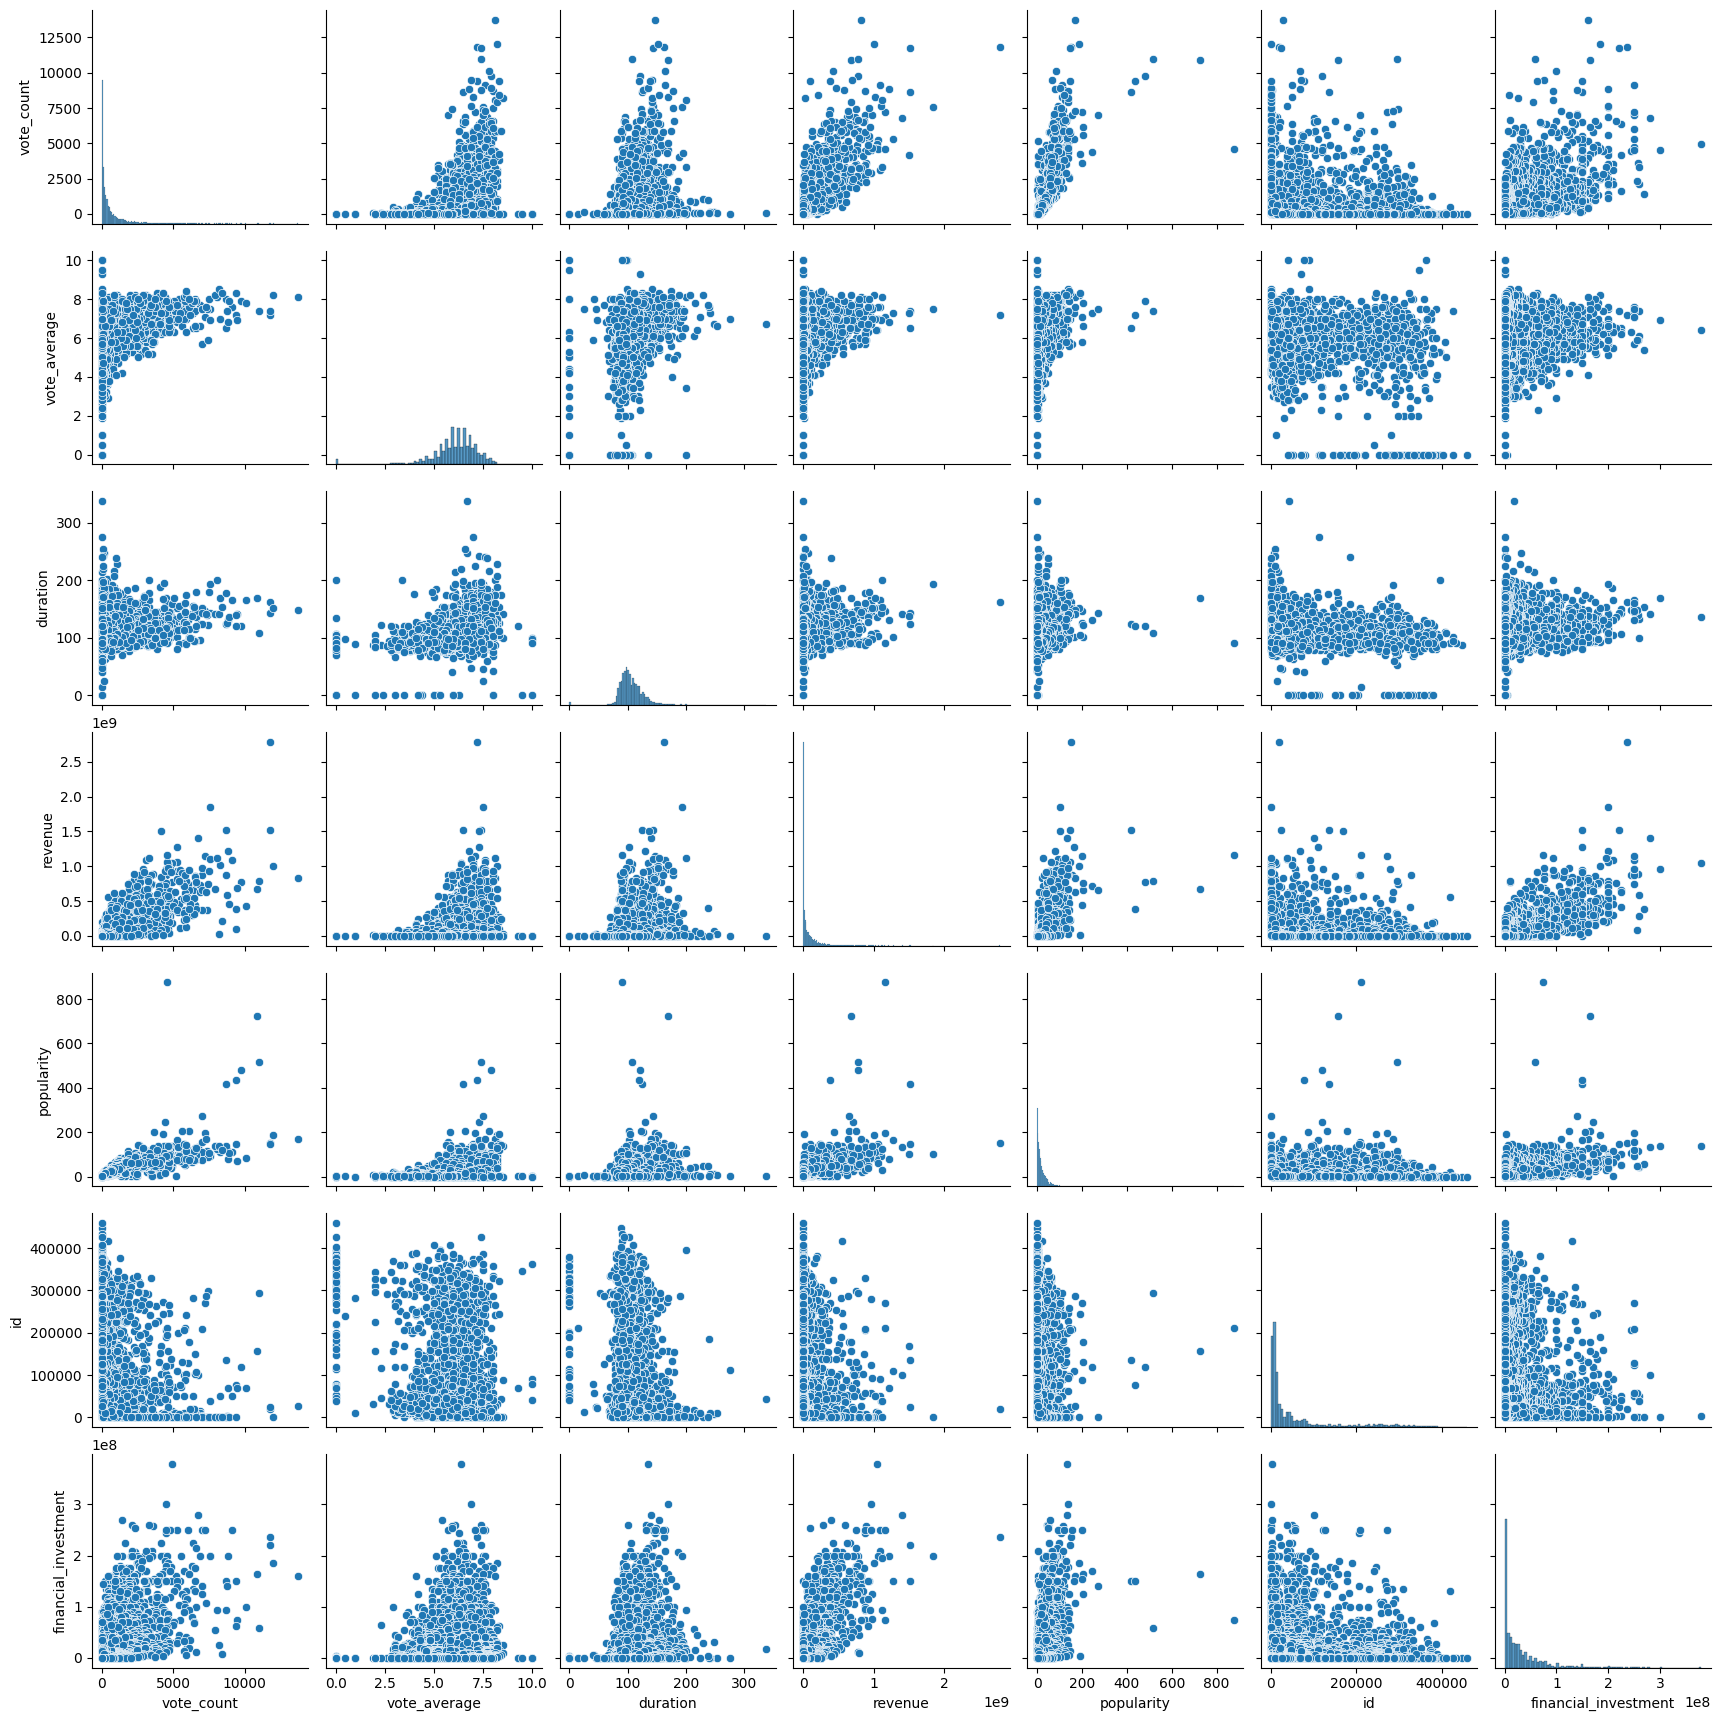

In [5]:
sns.pairplot(dataset_data)  # Visualize pairwise relationships using a pairplot
plt.show()

We can see that that the revenue will be affected by:
- the financial investment
- the vote count

For the other features (vote average, duration, popularity), it is not really visible the impact they have an the revenue

We can see that the vote average is affected by:
- the vote count
- the financial investment

We can see a big problem, that is the feature that are not number cannot be used to make an EDA with the way I make it.

### 5) Trends in the data

A) feature : financial_investment

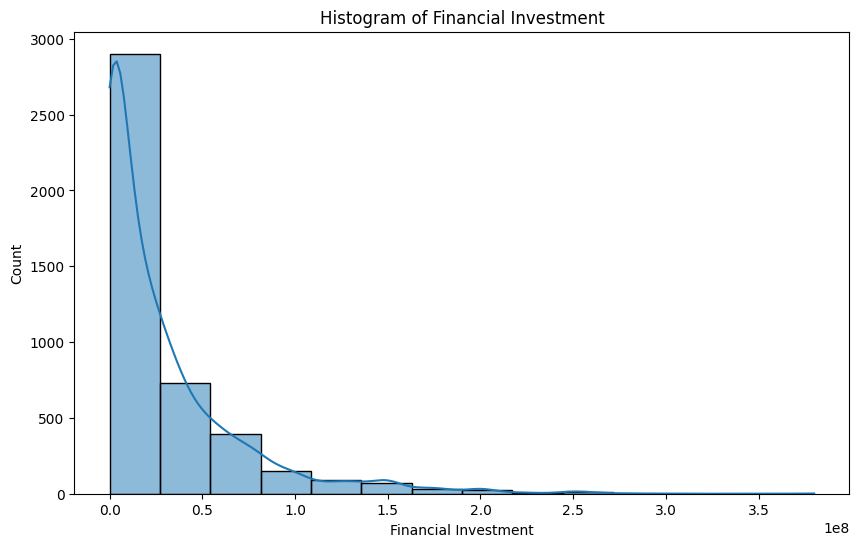

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data_combind['financial_investment'], bins=14, kde=True)
plt.title('Histogram of Financial Investment')
plt.xlabel('Financial Investment')
plt.show()

We can see that most of the data have an financial investment which are extremly small for a film. So we can question ourself if the remaining datas will be enought. Because if we only take the small financial investment then we only test for them and nothing else...

B) vote count

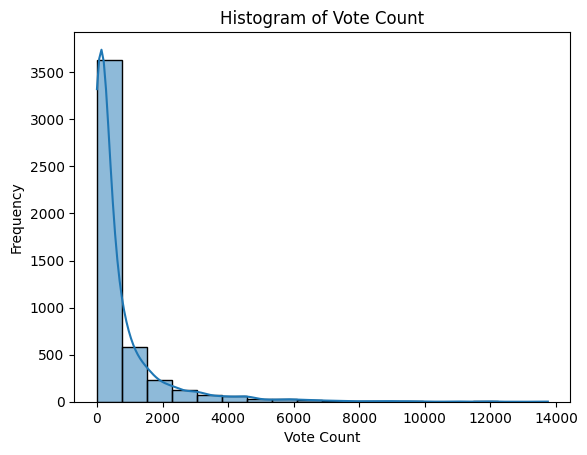

In [7]:
sns.histplot(data_combind['vote_count'], bins=18, kde=True)
plt.title('Histogram of Vote Count')
plt.xlabel('Vote Count')
plt.ylabel('Frequency')
plt.show()

Like for the financial investment, they are a lot of data with low number of vote for the films

C) Average vote

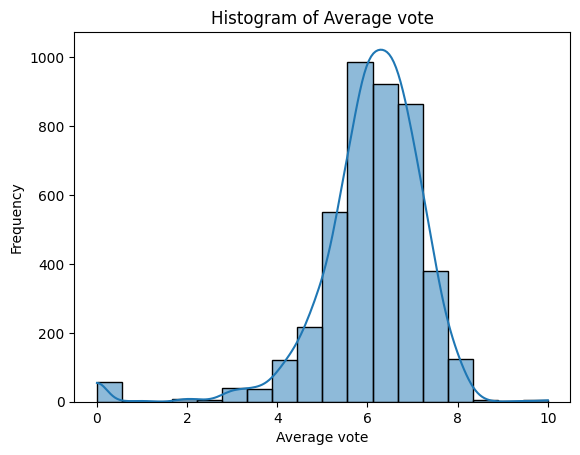

In [8]:
sns.histplot(data_combind['vote_average'], bins=18, kde=True)
plt.title('Histogram of Average vote')
plt.xlabel('Average vote')
plt.ylabel('Frequency')
plt.show()

We can see that for low score and high score they are not a lot film with those score.

D) Popularity

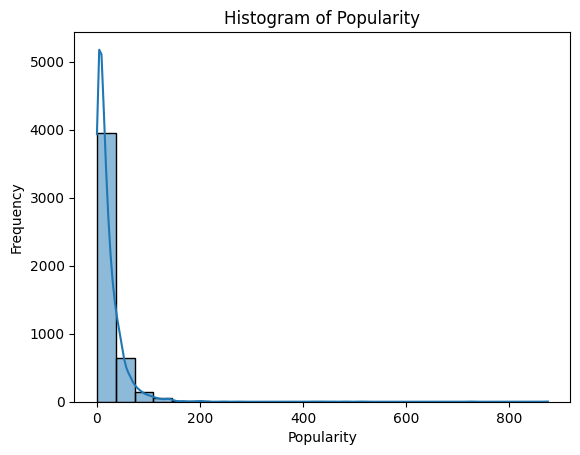

In [9]:
sns.histplot(data_combind['popularity'], bins=24, kde=True)
plt.title('Histogram of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

E) Duration

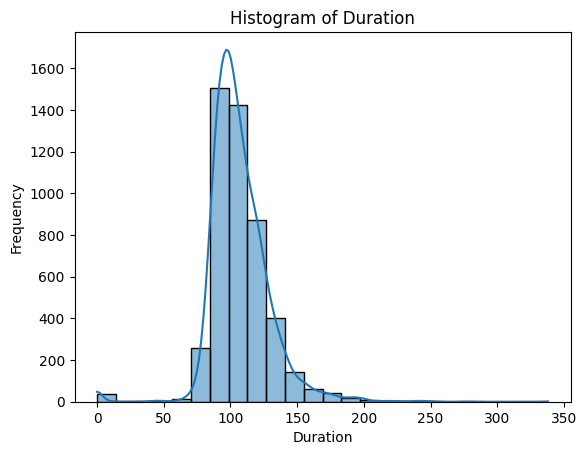

In [10]:
sns.histplot(data_combind['duration'], bins=24, kde=True)
plt.title('Histogram of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

F) Status

In [11]:
# sns.countplot(data=data_combind, x='status', order=data_combind['status'].value_counts().index)
# plt.title('Histogram of Status')
# plt.xlabel('Status')
# plt.ylabel('Frequency')
# plt.show()

We can see that praticly all the data for the status are in the released category

In [12]:
#test to see if my assumption was true
# data_combind.loc[data_combind.status != 'Released']

We can see that in the data set we only have 3 Post Production and 5 Rumored status which is clearly not enought to use them for prediction of their respective status

### 6) Patterns or correlations between features and the target

A) feature : financial_investment

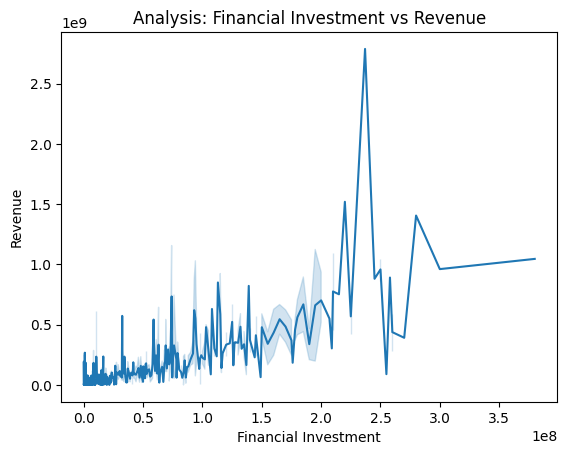

In [13]:
feature = 'financial_investment'
target = 'revenue'
sns.lineplot(x=feature, y=target, data =data_combind)  # Line plot
plt.title('Analysis: Financial Investment vs Revenue')
plt.xlabel('Financial Investment')
plt.ylabel('Revenue')
plt.show()

We can see that in general the higher is the financial investment and higher the revenue will be. Which is something logical because if you have more budget you can emploie more famous actor, make more special effect, have better movie set and multiple orther thing that will improve the quality of your film that should made the people love it more.

B) vote count

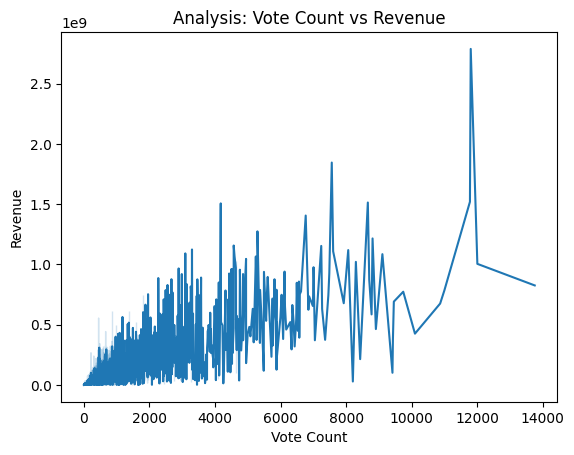

In [14]:
sns.lineplot(x='vote_count', y='revenue', data=data_combind)
plt.title('Analysis: Vote Count vs Revenue')
plt.xlabel('Vote Count')
plt.ylabel('Revenue')
plt.show()

We can see that with the vote count increasing it tends in means to increase the revenue. This tendency is logical because if there is a large number of vote it indicate that there is more exposure among the audience and it means that more people have seen it so it will increase the revenue.

C) Average vote

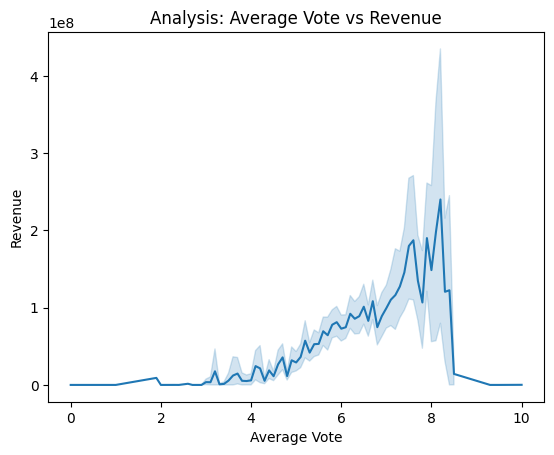

In [15]:
sns.lineplot(x='vote_average', y='revenue', data=data_combind)
plt.title('Analysis: Average Vote vs Revenue')
plt.xlabel('Average Vote')
plt.ylabel('Revenue')
plt.show()

We can see that te revenue really augment from the score of 4 to the score of 8 before decreasing drasticly until the full score of 10. This can be explain as the higher the score and the higher it will be appealing to the audiences and so create more revenue for the film. We can also see a drastic decrease of the revenue after 8.5 despite the increas of the score that can be due to a low number of vote so that score does not really represent the quality of the film.

In [16]:
#test to see if my assumption was true
data_combind.loc[data_combind.vote_average > 8.7]

,vote_count,vote_average,title,tagline,status,spoken_languages,duration,revenue,release,countries_of_production,...,popularity,overview,original_title,original_language,keywords,homepage,genres,financial_investment,actors,production_crew
id,,,,,,,,,,,,,,,,,,,,,
40963,1,10.0,Little Big Top,NaN,Rumored,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",0.0,0.0,2006-01-01,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0.092100,An aging out of work clown returns to his smal...,Little Big Top,en,"[{""id"": 10183, ""name"": ""independent film""}]",NaN,"[{""id"": 35, ""name"": ""Comedy""}]",0.0,"[{""cast_id"": 0, ""character"": ""Seymour"", ""credi...",[]
69848,2,9.3,One Man's Hero,One man's hero is another man's traitor.,Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",121.0,0.0,1999-08-02,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0.910529,One Man's Hero tells the little-known story of...,One Man's Hero,en,"[{""id"": 6091, ""name"": ""war""}, {""id"": 6092, ""na...",NaN,"[{""id"": 37, ""name"": ""Western""}, {""id"": 28, ""na...",0.0,"[{""cast_id"": 0, ""character"": ""Captain John Ril...","[{""credit_id"": ""558603f4c3a36837e90007f2"", ""de..."
78373,1,10.0,"Dancer, Texas Pop. 81",in the middle of nowhere they had everything,Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",97.0,565592.0,1998-05-01,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0.376662,"Four guys, best friends, have grown up togethe...","Dancer, Texas Pop. 81",en,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",NaN,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",0.0,"[{""cast_id"": 1, ""character"": ""Keller Coleman"",...","[{""credit_id"": ""52fe499bc3a368484e13445b"", ""de..."
89861,1,10.0,Stiff Upper Lips,NaN,Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",99.0,0.0,1998-06-12,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,0.356495,Stiff Upper Lips is a broad parody of British ...,Stiff Upper Lips,en,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",NaN,"[{""id"": 35, ""name"": ""Comedy""}]",0.0,"[{""cast_id"": 11, ""character"": ""Emily"", ""credit...","[{""credit_id"": ""52fe4a2f9251416c910c5edb"", ""de..."
346081,2,9.5,Sardaarji,NaN,Released,[],0.0,0.0,2015-06-26,"[{""iso_3166_1"": ""IN"", ""name"": ""India""}]",...,0.296981,A ghost hunter uses bottles to capture trouble...,Sardaarji,en,[],NaN,[],0.0,[],"[{""credit_id"": ""558ab3f4925141076f0001d7"", ""de..."
361505,2,10.0,Me You and Five Bucks,"A story about second, second chances",Released,[],90.0,0.0,2015-07-07,[],...,0.094105,"A womanizing yet lovable loser, Charlie, a wai...",Me You and Five Bucks,NaN,[],NaN,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",1.0,[],[]


We can see that my assumption was true there is only 1 or 2 vote for the high level score which meams that it is easier to make a score that does not reflect the quality of the film.

D) Popularity

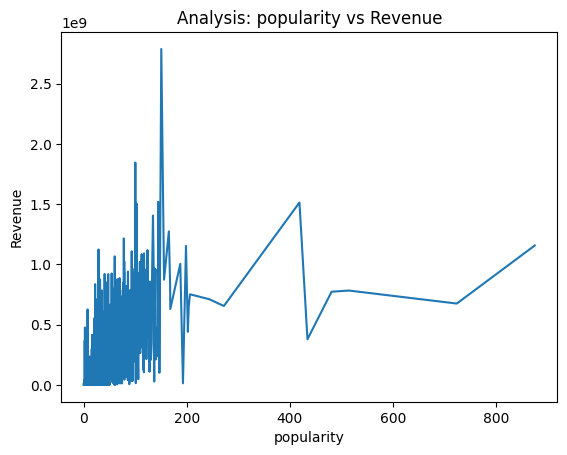

In [17]:
sns.lineplot(x='popularity', y='revenue', data=data_combind)
plt.title('Analysis: popularity vs Revenue')
plt.xlabel('popularity')
plt.ylabel('Revenue')
plt.show()

We cannot find a direct correlation between popularity and income. But we believe that popularity can make the film more visible and thus increase revenue.

E) Duration

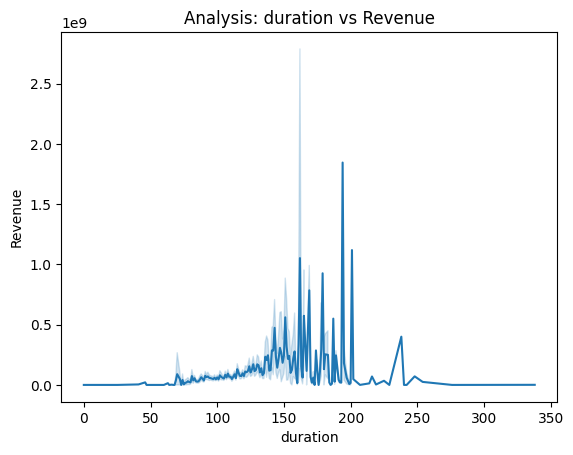

In [18]:

sns.lineplot(x='duration', y='revenue', data=data_combind)
plt.title('Analysis: duration vs Revenue')
plt.xlabel('duration')
plt.ylabel('Revenue')
plt.show()

We think this graph makes sense because if a movie is too short people will think they have been cheated and if the movie is too long they may find it boring.

F) Original languague

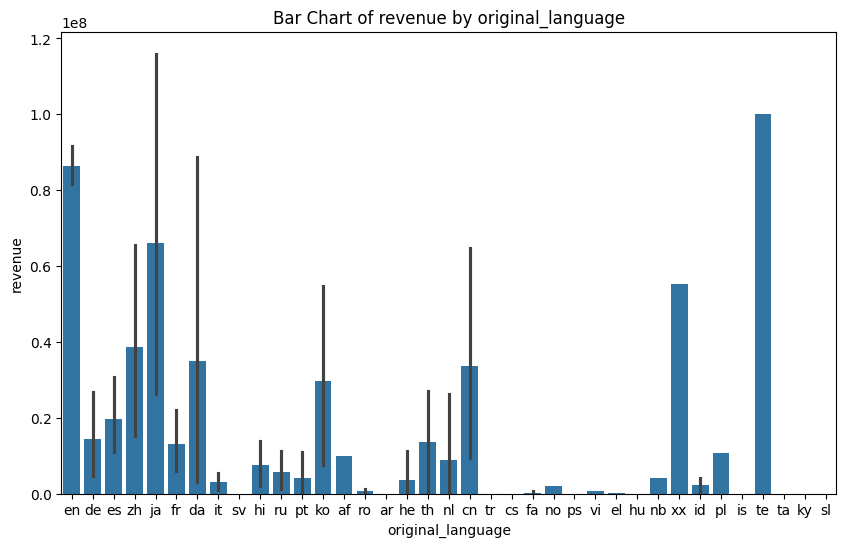

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data_combind ,x='original_language', y='revenue')
plt.title('Bar Chart of revenue by original_language')
plt.xlabel('original_language')
plt.ylabel('revenue')
plt.show()

## B) Feature Selection and Creation

In [20]:
data_combind.isnull().sum()

vote_count                    0
vote_average                480
title                         0
tagline                     844
status                        0
spoken_languages              0
duration                      2
revenue                      48
release                       1
countries_of_production       0
production                    0
popularity                    0
overview                      3
original_title                0
original_language           240
keywords                      0
homepage                   3091
genres                        0
financial_investment        384
actors                        0
production_crew               0
dtype: int64

We can see that they are 3091 null homepage entries on 4803, so we will discard this feature because they are too many missing datas.

In [21]:
data_combind.drop(columns=['homepage'], inplace=True)

We are going to see if all the datas are different or not

In [22]:
data_combind.nunique()

vote_count                 1609
vote_average                 70
title                      4800
tagline                    3944
status                        3
spoken_languages            544
duration                    156
revenue                    3268
release                    3280
countries_of_production     469
production                 3697
popularity                 4802
overview                   4800
original_title             4801
original_language            37
keywords                   4222
genres                     1175
financial_investment        412
actors                     4761
production_crew            4776
dtype: int64

We will not use the original_title column because it's different from the title column in a very rare case 261/4803, in all other cases it's the same so this feature isn't relevant.


In [23]:
n = 0
j = 0
for i in data_combind.index:
    if data_combind.title[i] != data_combind.original_title[i]:
        n+=1
    j+=1
print("values different : ", n , "/" , j)
data_combind.drop(columns=['original_title'], inplace=True)

values different :  261 / 4803


We will discard the columns overview and tagline because they are only texts that provide a brief summary of the film. Also, this is not relevant because it has nothing to do with the revenue, and it will not be well treated by the model.
The title column will also be dropped because it contains the same information as the overview and tagline. However, it is in a smaller text format but it's still a text format that the model can't handle.

In [24]:
data_combind.drop(columns=['overview'], inplace=True)
data_combind.drop(columns=['tagline'], inplace=True)
data_combind.drop(columns=['title'], inplace=True)

The status column is quite impactful on revenue because if the status is "Rumored", then the revenue will be 0, but if it is "Released", then it will have a value. However, there are only 5 rows with the "Rumored" status for over 4,000 entries. The ratio is too small to be relevant, so we will discard this column.

In [25]:
Rumored_only = data_combind.loc[data_combind['status'] == 'Rumored']
data_combind.drop(columns=['status'], inplace=True)
Rumored_only

,vote_count,vote_average,status,spoken_languages,duration,revenue,release,countries_of_production,production,popularity,original_language,keywords,genres,financial_investment,actors,production_crew
id,,,,,,,,,,,,,,,,
40963,1,10.0,Rumored,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",0.0,0.0,2006-01-01,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Fly High Films"", ""id"": 24248}]",0.092100,en,"[{""id"": 10183, ""name"": ""independent film""}]","[{""id"": 35, ""name"": ""Comedy""}]",0.0,"[{""cast_id"": 0, ""character"": ""Seymour"", ""credi...",[]
43630,2,4.8,Rumored,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",97.0,0.0,2005-01-01,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",[],0.020600,en,[],"[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam...",0.0,[],[]
57294,1,7.0,Rumored,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",93.0,0.0,2009-06-01,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]","[{""name"": ""Scottish Screen"", ""id"": 698}, {""nam...",0.108135,en,"[{""id"": 1930, ""name"": ""kidnapping""}, {""id"": 97...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",0.0,"[{""cast_id"": 3, ""character"": ""Joey Frisk"", ""cr...","[{""credit_id"": ""52fe492dc3a36847f818d031"", ""de..."
70875,0,0.0,Rumored,[],80.0,0.0,2011-07-29,[],[],0.010909,en,"[{""id"": 1729, ""name"": ""migration""}, {""id"": 190...","[{""id"": 99, ""name"": ""Documentary""}]",NaN,[],"[{""credit_id"": ""52fe4816c3a368484e0e8bbd"", ""de..."
84659,1,5.0,Rumored,[],110.0,0.0,2006-09-16,[],[],0.077577,en,[],"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",0.0,"[{""cast_id"": 1, ""character"": ""Alex"", ""credit_i...","[{""credit_id"": ""52fe49049251416c910a00b3"", ""de..."


the keyword columns is not relevant either because we already have genres to handle the type of content in the film

In [26]:
data_combind.drop(columns=['keywords'], inplace=True)

That's it for the feature selection.
Those are the selected features:

In [27]:
significant_features = ['vote_count', 'vote_average','spoken_languages', 'duration','release','countries_of_production', 'production',
        'popularity','original_language', 'genres', 'financial_investment', 'actors','production_crew']
data_combind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4803 entries, 5 to 459488
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vote_count               4803 non-null   int64  
 1   vote_average             4323 non-null   float64
 2   spoken_languages         4803 non-null   object 
 3   duration                 4801 non-null   float64
 4   revenue                  4755 non-null   float64
 5   release                  4802 non-null   object 
 6   countries_of_production  4803 non-null   object 
 7   production               4803 non-null   object 
 8   popularity               4803 non-null   float64
 9   original_language        4563 non-null   object 
 10  genres                   4803 non-null   object 
 11  financial_investment     4419 non-null   float64
 12  actors                   4803 non-null   object 
 13  production_crew          4803 non-null   object 
dtypes: float64(5), int64(1), ob

In [28]:
significant_featuresInt = ['vote_count', 'vote_average', 'duration', 'financial_investment', 'popularity']
#'original_language',
# We think that status is also an important feature but the number of the different status are not enought except for released.
target = 'revenue'

# we will remove all the ligne that contained a NaN target to avoid problem during the model learning step.
data_combind.dropna(subset=[target], inplace=True)


In [29]:
data_combind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4755 entries, 5 to 459488
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vote_count               4755 non-null   int64  
 1   vote_average             4276 non-null   float64
 2   spoken_languages         4755 non-null   object 
 3   duration                 4753 non-null   float64
 4   revenue                  4755 non-null   float64
 5   release                  4754 non-null   object 
 6   countries_of_production  4755 non-null   object 
 7   production               4755 non-null   object 
 8   popularity               4755 non-null   float64
 9   original_language        4519 non-null   object 
 10  genres                   4755 non-null   object 
 11  financial_investment     4375 non-null   float64
 12  actors                   4755 non-null   object 
 13  production_crew          4755 non-null   object 
dtypes: float64(5), int64(1), ob

We can see that now we have only the lignes that have a valid revenue target.

We need to transform the original_language with Ordinal Encoding.

### feature importance ranking

In [30]:
from sklearn.ensemble import RandomForestRegressor

# Assuming X is your feature matrix and y is your target variable
X = data_combind[significant_featuresInt]
y = data_combind['revenue']

# Initialize the random forest regressor
rf = RandomForestRegressor()

# Fit the model to your data
rf.fit(X, y)

# Extract feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance ranking
print(feature_importance_df)
print(y.median())
# y[1000000<y & y<100000000].count()

                Feature  Importance
0            vote_count    0.633377
3  financial_investment    0.198576
4            popularity    0.064203
2              duration    0.056958
1          vote_average    0.046885
19184015.0


## C) Data Pre-processing

Now that we know what we will work with we will make some preprocessing to be able to work with those datas.

In [31]:
print("significant features : ",significant_features)

significant features :  ['vote_count', 'vote_average', 'spoken_languages', 'duration', 'release', 'countries_of_production', 'production', 'popularity', 'original_language', 'genres', 'financial_investment', 'actors', 'production_crew']


In these features there is "numericals" and "object" datatypes and we will handle them differently. All the object types are in fact "strings", so we will use the ordinal encoding approach for them because there are too much different categories for the onehot encoding one, it would also take too long to train the model. 
We will separate the features into two sets "numerical columns" with all the int and float datatypes and "categorical columns" as all of the strings datatypes.

In [32]:
num_cols = [cname for cname in data_combind.columns if 
                data_combind[cname].dtype in ['int64', 'float64']]
cat_cols = [cname for cname in data_combind.columns if
                    data_combind[cname].dtype == "object"]
print("numerical columns: ",num_cols)
print("categorical columns: ",cat_cols)

numerical columns:  ['vote_count', 'vote_average', 'duration', 'revenue', 'popularity', 'financial_investment']
categorical columns:  ['spoken_languages', 'release', 'countries_of_production', 'production', 'original_language', 'genres', 'actors', 'production_crew']


#### Categorical data

The columns can't be used directly we have to preprocess them before. We can see that for the majority of the columns the values are in a dictionnary that's itself in a list. And there are lots of different values to choose for example in the actors column, with the "cast_id",the character played in the film, the "credit_id", the gender ect... We don't need all of those information to know which actor plays in a film. 
With all of this, the treatment of those columns will be difficult so we will extract the information we want and display it correctly.

In [33]:
data_combind[cat_cols].tail()

,spoken_languages,release,countries_of_production,production,original_language,genres,actors,production_crew
id,,,,,,,,
426067,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1990-01-01,[],[],NaN,"[{""id"": 27, ""name"": ""Horror""}]","[{""cast_id"": 1, ""character"": ""Dawn"", ""credit_i...","[{""credit_id"": ""582a4cdb9251417b1803dd47"", ""de..."
426469,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",2017-02-03,[],[],en,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10751, ""...","[{""cast_id"": 4, ""character"": ""Smith Bhatnagar""...","[{""credit_id"": ""582e0bdfc3a368772600b6c1"", ""de..."
433715,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",2014-06-15,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""After Eden Pictures"", ""id"": 85248}]",en,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 18, ""n...","[{""cast_id"": 3, ""character"": ""Amber"", ""credit_...","[{""credit_id"": ""58713acfc3a3684f0a00a9ac"", ""de..."
447027,[],2015-10-27,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]",en,"[{""id"": 10751, ""name"": ""Family""}]",[],[]
459488,[],2015-12-12,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]","[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]",en,"[{""id"": 99, ""name"": ""Documentary""}]","[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""592b25e4c3a368783e065a2f"", ""de..."


For the "spoken language" column there is the "iso_639_1" key and the "name" key, we will take the "iso_639_1" key because the other key gives the hole name of the language and with only 2 letters to compare we would gain some speed of treatment, two letters should be sufficient to know which language is spoken, this is the same for the "countries of production" column.

The "production" and "genres" column have the same structure, an id and a name. For those two we will take the "name" key. We will do the same for the two last columns "actors" and "production_crew".

We'll only take the first information for each column, for example we'll take the first actor in the list, the first production_crew, ect.
Because there already are some ranking inside of the list so the first element is the most important of the list.

Also there are some lists that are empty in almost all columns, we will replace them by a NaN value so it will be easier to handle them later.

In [34]:
import json
def extract_data(row, col_name, iso_num):
    langperligne = 0
    lst = json.loads(row[col_name])
    try:
        item = lst[0]
        langperligne = item[iso_num]
    except:
        langperligne = np.nan
    return langperligne

data_combind['countries_of_production'] = data_combind.apply(lambda row: extract_data(row, 'countries_of_production', 'iso_3166_1'), axis=1)
data_combind['spoken_languages'] = data_combind.apply(lambda row: extract_data(row, 'spoken_languages', 'iso_639_1'), axis=1)
data_combind['genres'] = data_combind.apply(lambda row: extract_data(row, 'genres', 'name'), axis=1)
data_combind['production'] = data_combind.apply(lambda row: extract_data(row, 'production', 'name'), axis=1)
data_combind['actors'] = data_combind.apply(lambda row: extract_data(row, 'actors', 'name'), axis=1)
data_combind['production_crew'] = data_combind.apply(lambda row: extract_data(row, 'production_crew', 'name'), axis=1)
data_combind[cat_cols].tail()

,spoken_languages,release,countries_of_production,production,original_language,genres,actors,production_crew
id,,,,,,,,
426067,en,1990-01-01,NaN,NaN,NaN,Horror,Lisa Hart Carroll,Pece Dingo
426469,en,2017-02-03,NaN,NaN,en,Comedy,Roni Akurati,Frank Lotito
433715,en,2014-06-15,US,After Eden Pictures,en,Thriller,Nicole Smolen,Jaco Booyens
447027,NaN,2015-10-27,US,New Kingdom Pictures,en,Family,NaN,NaN
459488,NaN,2015-12-12,GB,Eyeline Entertainment,en,Documentary,Tony Oppedisano,Simon Napier-Bell


In the result showed above we have clean columns with the first value of the list that has been chosen. But there is still work to be done:
- we have to replace the missing values 'NaN', that had been replaced before, by something relevant 
- the release column is too precise, it shows the specific day when the film has been released, but it creates too much different categories.

For the first point we will use an imputer that will create a dataframe based on the original but it will replace all of the 'NaN' values by something else, here we will chose to replace them by the most frequent value in the given column.

In [73]:
from sklearn.impute import SimpleImputer

my_cat_imputer = SimpleImputer(strategy='most_frequent')
cat_imputed = pd.DataFrame(my_cat_imputer.fit_transform(data_combind[cat_cols]))
cat_imputed.columns = data_combind[cat_cols].columns
my_num_imputer = SimpleImputer(strategy='mean')
num_imputed = pd.DataFrame(my_num_imputer.fit_transform(data_combind[num_cols]))
num_imputed.columns = data_combind[num_cols].columns
data_imputed = cat_imputed.join(num_imputed)
data_imputed = data_imputed.astype(data_combind.dtypes)
data_imputed.head()

,spoken_languages,release,countries_of_production,production,original_language,genres,actors,production_crew,vote_count,vote_average,duration,revenue,popularity,financial_investment
0,en,1995-12-09,US,Miramax Films,en,Crime,Tim Roth,Allison Anders,530,6.500000,98.0,4300000.0,22.876230,4000000.0
1,en,1977-05-25,US,Lucasfilm,en,Adventure,Mark Hamill,George Lucas,6624,6.091394,121.0,775398007.0,126.393695,11000000.0
2,en,2003-05-30,US,Pixar Animation Studios,en,Animation,Albert Brooks,Andrew Stanton,6122,7.600000,100.0,940335536.0,85.688789,94000000.0
3,en,1994-07-06,US,Paramount Pictures,en,Comedy,Tom Hanks,Alan Silvestri,7927,8.200000,142.0,677945399.0,138.133331,55000000.0
4,en,1999-09-15,US,DreamWorks SKG,en,Drama,Kevin Spacey,Thomas Newman,3313,7.900000,122.0,356296601.0,80.878605,15000000.0


For the release column, we will only take the year of the date.

In [74]:
data_imputed['release'] = data_imputed['release'].str.slice(stop=4)
data_imputed[cat_cols].tail()

,spoken_languages,release,countries_of_production,production,original_language,genres,actors,production_crew
4750,en,1990,US,Paramount Pictures,en,Horror,Lisa Hart Carroll,Pece Dingo
4751,en,2017,US,Paramount Pictures,en,Comedy,Roni Akurati,Frank Lotito
4752,en,2014,US,After Eden Pictures,en,Thriller,Nicole Smolen,Jaco Booyens
4753,en,2015,US,New Kingdom Pictures,en,Family,Bruce Willis,Avy Kaufman
4754,en,2015,GB,Eyeline Entertainment,en,Documentary,Tony Oppedisano,Simon Napier-Bell


Now we have a clean dataset with only one value to be used per object instead of a list of dictionnaries and we can work with it.


In [75]:
data_imputed[cat_cols].nunique()

spoken_languages             56
release                      90
countries_of_production      70
production                 1306
original_language            37
genres                       20
actors                     2084
production_crew            2213
dtype: int64

The number of unique elements has been significantly reduced so that we can use them for the Ordinal Encoder. Except for the "production", "actors" and "production_crew" collumns but we cannot reduice them more than that.

We use the Ordinal Encodeur to transform the type object into a float value to be able to use them later with the different model.

In [76]:
from sklearn.preprocessing import OrdinalEncoder

# Assuming your dataset is a DataFrame and significant_features is your list of features
significant_features_to_encoder = ['spoken_languages','countries_of_production', 'production', 'original_language', 'genres', 'actors','production_crew']

# Initialize OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the selected features
encoded_features = ordinal_encoder.fit_transform(data_imputed[significant_features_to_encoder])

# Update the DataFrame with encoded values
data_imputed[significant_features_to_encoder] = encoded_features

#since the date was already just a number we changed the type to int
data_imputed['release'] = data_imputed['release'].astype(np.int64)

In [77]:
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4755 entries, 0 to 4754
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   spoken_languages         4755 non-null   float64
 1   release                  4755 non-null   int64  
 2   countries_of_production  4755 non-null   float64
 3   production               4755 non-null   float64
 4   original_language        4755 non-null   float64
 5   genres                   4755 non-null   float64
 6   actors                   4755 non-null   float64
 7   production_crew          4755 non-null   float64
 8   vote_count               4755 non-null   int64  
 9   vote_average             4755 non-null   float64
 10  duration                 4755 non-null   float64
 11  revenue                  4755 non-null   float64
 12  popularity               4755 non-null   float64
 13  financial_investment     4755 non-null   float64
dtypes: float64(12), int64(2)

We can see that all the data are complete and have the good type.

In [78]:
data_imputed.head()


,spoken_languages,release,countries_of_production,production,original_language,genres,actors,production_crew,vote_count,vote_average,duration,revenue,popularity,financial_investment
0,13.0,1995,68.0,786.0,7.0,4.0,1944.0,61.0,530,6.500000,98.0,4300000.0,22.876230,4000000.0
1,13.0,1977,68.0,722.0,7.0,1.0,1303.0,735.0,6624,6.091394,121.0,775398007.0,126.393695,11000000.0
2,13.0,2003,68.0,917.0,7.0,2.0,50.0,85.0,6122,7.600000,100.0,940335536.0,85.688789,94000000.0
3,13.0,1994,68.0,890.0,7.0,3.0,1964.0,34.0,7927,8.200000,142.0,677945399.0,138.133331,55000000.0
4,13.0,1999,68.0,349.0,7.0,6.0,1126.0,2053.0,3313,7.900000,122.0,356296601.0,80.878605,15000000.0


We can see that ordinal encoder did it's job to transform all the objects into numbers.

### Split the dataset into training, validation, and test sets

In [85]:
from sklearn.model_selection import train_test_split
significant_features = ['vote_count', 'vote_average','spoken_languages', 'duration','release','countries_of_production', 'production',
        'popularity','original_language', 'genres', 'financial_investment', 'actors','production_crew']

X = data_imputed[significant_features]
y = data_imputed['revenue']

# Assuming X contains your features and y contains your target variable
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [86]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the random forest regressor
rf = RandomForestRegressor()

# Fit the model to your data
rf.fit(X, y)

# Extract feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance ranking
print(feature_importance_df)

                    Feature  Importance
0                vote_count    0.630453
10     financial_investment    0.148514
7                popularity    0.037826
3                  duration    0.033500
4                   release    0.028986
6                production    0.026191
12          production_crew    0.025209
11                   actors    0.023701
1              vote_average    0.021129
9                    genres    0.015251
5   countries_of_production    0.005559
2          spoken_languages    0.003487
8         original_language    0.000195


## D) Model Comparison and Hyperparameter selection

### Random forest

In [104]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=650, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=650, random_state=42)

In [105]:
# Make predictions on the validation set
y_val_pred = rf_model.predict(X_val)

In [106]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate evaluation metrics
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Absolute Error (MAE): 38222489.262352176
Mean Squared Error: 5787022826721853.0
R-squared Score: 0.7324582100420369


The MAE indicates, on average, how far the predicted revenue values are from the actual revenue values. The MSE quantifies the average squared difference between the predicted and actual revenue values, giving more weight to large errors. The R-squared score indicates the proportion of the variance in the revenue that is predictable by the model, with a score closer to 1 indicating better prediction.

These metrics suggest that while the model's predictions may have large errors (as indicated by the large MAE and MSE), it explains around 73.24% of the variance in the revenue, which is a decent performance.

In [99]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid
param_grid = {
    'n_estimators': [500, 600, 650],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error')

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Initialize the model with the best hyperparameters
best_rf_model = RandomForestRegressor(**best_params, random_state=42)

# Train the model on the entire training data
best_rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=650,
                      random_state=42)

In [100]:
# Make predictions on the validation set using the tuned model
y_val_pred_tuned = best_rf_model.predict(X_val)

# Calculate evaluation metrics for the tuned model
mse_tuned = mean_squared_error(y_val, y_val_pred_tuned)
r2_tuned = r2_score(y_val, y_val_pred_tuned)
mae = mean_absolute_error(y_val, y_val_pred)

print("Mean Absolute Error (MAE):", mae)
print("Tuned Model Mean Squared Error:", mse_tuned)
print("Tuned Model R-squared Score:", r2_tuned)


Mean Absolute Error (MAE): 38468670.90287067
Tuned Model Mean Squared Error: 5852146130341675.0
Tuned Model R-squared Score: 0.7294474727873003


Initial Random Forest Model:

Mean Absolute Error (MAE): 38222489.262352176

Mean Squared Error: 5787022826721853.0

R-squared Score: 0.7324582100420369


Tuned Random Forest Model:

Mean Absolute Error (MAE): 38,468,670.90287067

Mean Squared Error (MSE): 5,852,146,130,341,675.0

R-squared Score: 0.7294474727873003

Upon comparison, it appears that the tuned Random Forest model did not yield any improvement over the initial model. The Mean Absolute Error, Mean Squared Error, and R-squared Score remained identical after tuning. This suggests that the parameter grid used for tuning did not significantly impact the model's performance on the validation data.

### decision trees

In [128]:
from sklearn.tree import DecisionTreeRegressor

# Initialize Decision Tree model
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [129]:
# Make predictions on the validation set
y_val_pred_dt = dt_model.predict(X_val)

In [130]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate evaluation metrics
mse_dt = mean_squared_error(y_val, y_val_pred_dt)
r2_dt = r2_score(y_val, y_val_pred_dt)
mae = mean_absolute_error(y_val, y_val_pred)

print("Mean Absolute Error (MAE):", mae)
print("Decision Tree Mean Squared Error:", mse_dt)
print("Decision Tree R-squared Score:", r2_dt)

Mean Absolute Error (MAE): 38222489.262352176
Decision Tree Mean Squared Error: 6519110255403368.0
Decision Tree R-squared Score: 0.6986128310034813


In [131]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                              param_grid=param_grid,
                              cv=5,
                              scoring='neg_mean_squared_error')

# Perform Grid Search
grid_search_dt.fit(X_train, y_train)

# Get the best hyperparameters
best_params_dt = grid_search_dt.best_params_

# Initialize the model with the best hyperparameters
best_dt_model = DecisionTreeRegressor(**best_params_dt, random_state=42)

# Train the model on the entire training data
best_dt_model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=3, random_state=42)

In [132]:
# Make predictions on the validation set using the tuned model
y_val_pred_dt_tuned = best_dt_model.predict(X_val)

# Calculate evaluation metrics for the tuned model
mse_dt_tuned = mean_squared_error(y_val, y_val_pred_dt_tuned)
r2_dt_tuned = r2_score(y_val, y_val_pred_dt_tuned)
mae = mean_absolute_error(y_val, y_val_pred)

print("Mean Absolute Error (MAE):", mae)
print("Tuned Decision Tree Mean Squared Error:", mse_dt_tuned)
print("Tuned Decision Tree R-squared Score:", r2_dt_tuned)


Mean Absolute Error (MAE): 38222489.262352176
Tuned Decision Tree Mean Squared Error: 8263347309432931.0
Tuned Decision Tree R-squared Score: 0.6179744237396865


Use of pipelines to clean up the modeling code and use the cross-validation for better measures of model performance

In [133]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestRegressor(n_estimators=150,
                                                              random_state=0))
                             ])

In [134]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

MAE scores:
 [72634511.0926814  37493063.20743078 24334570.91970557 30847807.07200841
 43631386.30134595]


In [135]:
print("Average MAE score (across experiments):")
print(scores.mean())

Average MAE score (across experiments):
41788267.71863442


### XGBoost

In [136]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [137]:
from sklearn.metrics import mean_absolute_error

predictions = my_model.predict(X_val)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_val)))

Mean Absolute Error: 39528541.09558812


In [138]:
my_model2 = XGBRegressor(n_estimators=500)
my_model2.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [139]:
from sklearn.metrics import mean_absolute_error

predictions = my_model2.predict(X_val)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_val)))

Mean Absolute Error: 39960955.13709356


To avoid overfitting we can use the early_stopping_rounds that will stop iterating when the validation score stops improving even if we did not attain the n_estimators.
You also need to set aside some data for calculating the validation scores - this is done by setting the eval_set parameter.

In [140]:
my_model3 = XGBRegressor(n_estimators=500)
my_model3.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_val, y_val)],
             verbose=False)

c:\Users\coren\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [141]:
from sklearn.metrics import mean_absolute_error

predictions = my_model3.predict(X_val)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_val)))

Mean Absolute Error: 38383210.168995626


We can also define the learning_rate which define the step in the gradient descent.

In [142]:
my_model4 = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model4.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_val, y_val)], 
             verbose=False)

c:\Users\coren\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [143]:
from sklearn.metrics import mean_absolute_error

predictions = my_model4.predict(X_val)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_val)))

Mean Absolute Error: 38764839.608430274


We can see that the Mean Absolute Error is lower than before.

n_jobs equal to the number of cores on your machine. For us this parametter is not really usefull.

In [144]:
my_model5 = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model5.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_val, y_val)], 
             verbose=False)

c:\Users\coren\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=4,
             num_parallel_tree=None, random_state=None, ...)

In [145]:
from sklearn.metrics import mean_absolute_error

predictions = my_model5.predict(X_val)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_val)))

Mean Absolute Error: 38764839.608430274


We can see that it only change the speed of the process not the result.